<a href="https://colab.research.google.com/github/Jimin980921/DeepLearning/blob/master/CNN_fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
keras.__version__
keras.preprocessing

<module 'keras.preprocessing' from '/usr/local/lib/python3.6/dist-packages/keras/preprocessing/__init__.py'>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [0]:
!unzip dataset.zip

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [0]:
classifier=Sequential()

In [0]:
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
#필러 갯수, 필러 열, 필러 행, input이미지(x,y,채널),활성화함수

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
classifier.add(Convolution2D(32,2,2,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (2, 2), activation="relu")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.add(Flatten())
#2차원을 1차원으로

In [0]:
#완전 연결
classifier.add(Dense(output_dim=128,activation='relu'))
#(activation,units)
#출력 가중치 차원, 활성화 함수

classifier.add(Dense(output_dim=1,activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """


In [0]:
#CNN 컴파일
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive')
#구글드라이브, colab연동


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# loading img
import PIL.Image as Image
baseDir='/content/gdrive/My Drive/Colab Notebooks/dataset'
os.chdir(baseDir)

def resize_img(img,size):
    return img.resize(size)

def load_img(file_path):
  data = []
  print(baseDir + file_path[1:] + '/')
  for f in os.listdir(file_path):
    data.append(resize_img(Image.open(baseDir + file_path[1:] + '/' + f) , (64,64)))
  return data

train_set = load_img('./train_set')
test_set = load_img('./test_set')

/content/gdrive/My Drive/Colab Notebooks/dataset/train_set/
/content/gdrive/My Drive/Colab Notebooks/dataset/test_set/


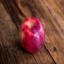

In [74]:
(train_set[0])

In [70]:
len(test_set)

60

# **전처리**

In [77]:
#X_train,y_train는 train data 
#X_test,y_test는 validation data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_set, test_size=0.3)

ValueError: ignored

In [61]:
training_set = train_datagen.flow_from_directory(trainDir,                        #훈련
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
#flow_from_directory=주어진 경로에서 배치 사이즈만큼 변형 이미지 생성. 원본이 변하는것은 아님.

test_set = test_datagen.flow_from_directory(testDir,                              #테스트
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical') 

Found 0 images belonging to 1 classes.
Found 0 images belonging to 0 classes.


In [0]:
classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 2000)